<a href="https://colab.research.google.com/github/hariszaf/metabolic_toy_model/blob/main/Antony2025/computationalMethods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Computational Methods Applied To Genome-Scale Metabolic Models**

In [43]:
import numpy as np 
import sys, os

sys.path.append( os.path.dirname(os.getcwd()) )
from scripts.intro import FluxBalanceAnalysis, constrain_plane_in_3D

## Background 

#### What is LP? 

From its nicely put [wiki lemma](https://en.wikipedia.org/wiki/Linear_programming): 

**Linear programming (LP**), also called **linear optimization**, is a method to achieve the *best* outcome (such as *maximum* profit or *lowest* cost) in a mathematical *model* whose ***requirements*** and ***objective*** are represented by **linear relationships**. 
Linear programming is a special case of mathematical programming (also known as mathematical optimization).

![starwars](https://img.filmsactu.net/datas/films/s/t/star-wars-episode-ix/n/star-wars-episode-ix-gif-5ccb96a1c2f0a.gif)

Linear programs are problems that can be expressed in standard form as:


\begin{array}{l r}
    \text{(Find a vector in which you are interested in, e.g. fluxes of a set of reactions)} & x \\
    \text{(that maximizes a certain objective function, e.g. the ATP production)} & c^T x \\
    \text{(subject to, meaning that it respects a set of constraints)} & Av \leq b \\
    \text{(and some extra constraints!)} & x \geq 0
\end{array}



Let us see an example on what this would mean for a metabolic network. Consider a very short pathway that consists of only four reactions.

![s_example](../files/figs/s_examples.png)

> Hint :warning:
>
> As you can see, metabolite and reaction names in this case do not have the `rxn` and `cpd` prefixes. That is cause they come from another ontology called [BiGG ](http://bigg.ucsd.edu). We will discuss that at a later point.

In this figure, you can see the basic concept of metabolic modeling analysis. 
The network on the left is just a representation of what we are actually using, a list of enzymes (RNDR2, GKI, PYK etc.)! 

The **stoichiometry** of each of those reactions is **always the same, across all different taxa**! 

Therefore, from a list of enzymes, we can build the $S$ table on the right, where each row is a metabolite and its column is a reaction, with the values on the table per column, represent the stoichiometry of the corresponding reaction!

> :question: **Task!**
>
> Who can describe us how the PYK reaction of the network is represented on the $S$ table?  

Yet, what we are interested in are the fluxes, but what is it actually a flux ? 


<video controls src="https://player.vimeo.com/video/542375960?badge=0&loop=1&autopause=0&player_id=0&app_id=58479" width=500 heigh=600>

Optimization Result:         message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: -5.0
              x: [ 5.000e+00  5.000e+00]
            nit: 0
          lower:  residual: [ 7.000e+00  5.000e+00]
                 marginals: [ 0.000e+00  0.000e+00]
          upper:  residual: [ 1.000e+01  0.000e+00]
                 marginals: [ 0.000e+00 -1.000e+00]
          eqlin:  residual: [ 0.000e+00]
                 marginals: [-0.000e+00]
        ineqlin:  residual: []
                 marginals: []
 mip_node_count: 0
 mip_dual_bound: 0.0
        mip_gap: 0.0


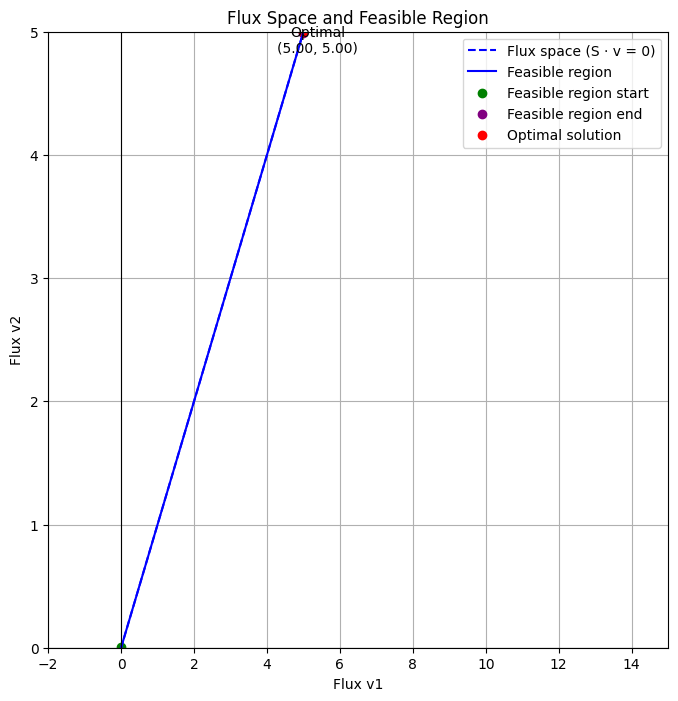

In [49]:
# Stoichiometric matrix for a single reaction: A -> B, constraints are -v1 + v2 = 0
S = np.array([[1, -1]])

# Bounds: flux 1 between 0 and 5, flux 2 between 0 and 5
bounds = [(-2, 15), (0, 5)]

# Objective: Maximize v2 (e.g., production of B)
objective = np.array([0, 1])

# Create the FBA instance
fba = FluxBalanceAnalysis(S, bounds, objective)

# Run optimization
result = fba.optimize()
print("Optimization Result:", result)

# Visualize the geometry
fba.visualize_geometry()

### What is a constraint ? 

In [48]:
constrain_plane_in_3D()

Opening in existing browser session.


Opening in existing browser session.


In [12]:

# This should pop up on a new tab on your browser
intro.samples_in_constraint_3D(
    r1_bounds = [5, 10],
    r2_bounds = [5, 10],
    r3_bounds = [0,  40],
    r3_relationship = [-1, -1]
)




Opening in existing browser session.
